In [1]:
import prepare
import acquire
import exploration
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import os
import split
import matplotlib.pyplot as plt
import itertools

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import modeling

alpha = 0.05

In [2]:
titanic_df, categories, quant_cols = prepare.acquire_prep_titanic()
titanic_df

train, validate, test = split.train_validate_test_split(titanic_df, 'survived')
train.head()

     survived  pclass   age  sibsp  parch     fare  alone  embarked_Q  \
0           0       3  22.0      1      0   7.2500      0           0   
1           1       1  38.0      1      0  71.2833      0           0   
2           1       3  26.0      0      0   7.9250      1           0   
3           1       1  35.0      1      0  53.1000      0           0   
4           0       3  35.0      0      0   8.0500      1           0   
..        ...     ...   ...    ...    ...      ...    ...         ...   
886         0       2  27.0      0      0  13.0000      1           0   
887         1       1  19.0      0      0  30.0000      1           0   
888         0       3   NaN      1      2  23.4500      0           0   
889         1       1  26.0      0      0  30.0000      1           0   
890         0       3  32.0      0      0   7.7500      1           1   

     embarked_S  sex_male  
0             1         1  
1             0         0  
2             1         0  
3          

,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male
583,0,1,36.0,0,0,40.1250,1,0,0,1
165,1,3,9.0,0,2,20.5250,0,0,1,1
50,0,3,7.0,4,1,39.6875,0,0,1,1
259,1,2,50.0,0,1,26.0000,0,0,1,0
306,1,1,NaN,0,0,110.8833,1,0,0,0


In [3]:
for col in titanic_df.columns:
    print(titanic_df[col].value_counts())
    print(f'NaN: {titanic_df[col].isna().sum()}')
    
    

0    549
1    342
Name: survived, dtype: int64
NaN: 0
3    491
1    216
2    184
Name: pclass, dtype: int64
NaN: 0
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64
NaN: 177
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
NaN: 0
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
NaN: 0
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64
NaN: 0
1    537
0    354
Name: alone, dtype: int64
NaN: 0
0    814
1     77
Name: embarked_Q, dtype: int64
NaN: 0
1    644
0    247
Name: embarked_S, dtype: int64
NaN: 0
1    577
0    314
Name: sex_male, dtype: int64
NaN: 0


In [4]:
imputer =SimpleImputer(missing_values= np.NaN, strategy='most_frequent')
imputer = imputer.fit(train[['age']])

train[['age']] = imputer.transform(train[['age']])
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

train.isna().sum()


survived      0
pclass        0
age           0
sibsp         0
parch         0
fare          0
alone         0
embarked_Q    0
embarked_S    0
sex_male      0
dtype: int64

In [5]:
x_train = train.drop(columns=['survived'])
y_train = train.survived

x_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

x_test = test.drop(columns=['survived'])
y_test = test.survived

In [6]:
# create object
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [7]:
# fit model
clf = clf.fit(x_train, y_train)

[Text(333.68399999999997, 342.46799999999996, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(159.588, 266.364, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(58.032, 190.26, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(29.016, 114.156, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(87.048, 114.156, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]\nclass = 1'),
 Text(58.032, 38.051999999999964, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = 1'),
 Text(116.064, 38.051999999999964, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]\nclass = 1'),
 Text(261.144, 190.26, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(203.112, 114.156, 'age <= 35.0\ngini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(174.096, 38.051999999999964, 'gini = 0.455\nsamples = 63\nvalue = [22, 41]\nclass = 1'),
 Text(232.128, 38.0519999999

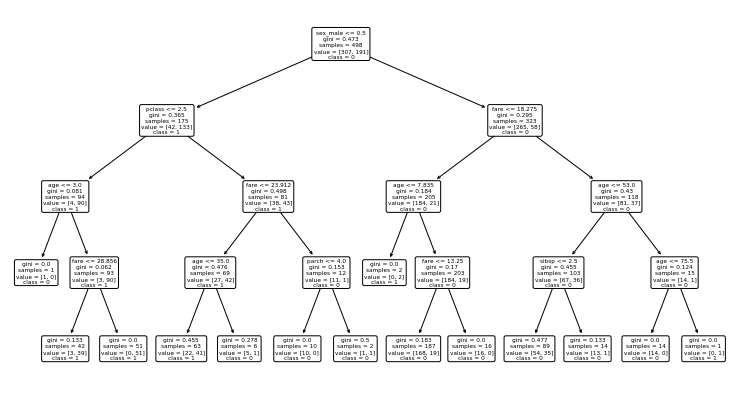

In [8]:
# visualize
plt.figure(figsize=(13,7))
plot_tree(clf, feature_names=x_train.columns, class_names=clf.classes_.astype('str'),
         rounded=True)

In [9]:
# predicitons on train observations

y_pred = clf.predict(x_train)
y_pred[:5]

array([0, 0, 0, 1, 1])

In [10]:
# estimate probability
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[:5]

array([[0.60674157, 0.39325843],
       [0.60674157, 0.39325843],
       [0.92857143, 0.07142857],
       [0.07142857, 0.92857143],
       [0.        , 1.        ]])

In [11]:
# computing accuracy
print(f'Accuracy of Decision Tree on training set: {clf.score(x_train,y_train)}')

Accuracy of Decision Tree on training set: 0.8353413654618473


In [12]:
# confusion matrix
confusion_matrix(y_train, y_pred)

array([[282,  25],
       [ 57, 134]])

In [13]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [14]:
print(f'Accuracy of Decision Tree on validate: {clf.score(x_validate, y_validate)}')

Accuracy of Decision Tree on validate: 0.794392523364486


In [15]:
y_pred = clf.predict(x_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       132
           1       0.77      0.66      0.71        82

    accuracy                           0.79       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.79      0.79      0.79       214



     survived  pclass   age  sibsp  parch     fare  alone  embarked_Q  \
0           0       3  22.0      1      0   7.2500      0           0   
1           1       1  38.0      1      0  71.2833      0           0   
2           1       3  26.0      0      0   7.9250      1           0   
3           1       1  35.0      1      0  53.1000      0           0   
4           0       3  35.0      0      0   8.0500      1           0   
..        ...     ...   ...    ...    ...      ...    ...         ...   
886         0       2  27.0      0      0  13.0000      1           0   
887         1       1  19.0      0      0  30.0000      1           0   
888         0       3   NaN      1      2  23.4500      0           0   
889         1       1  26.0      0      0  30.0000      1           0   
890         0       3  32.0      0      0   7.7500      1           1   

     embarked_S  sex_male  
0             1         1  
1             0         0  
2             1         0  
3          

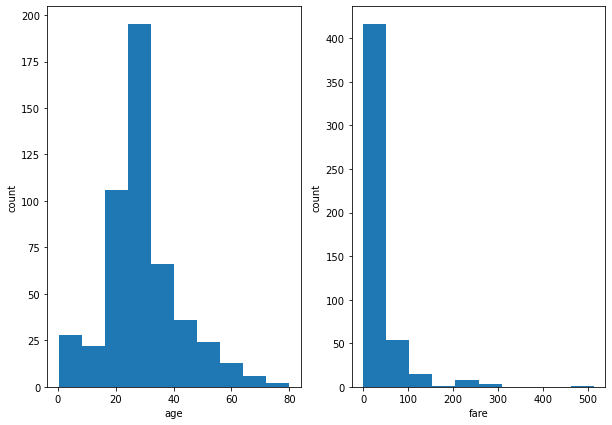

<class 'pandas.core.frame.DataFrame'>
Plots: [<AxesSubplot:>, <AxesSubplot:>]


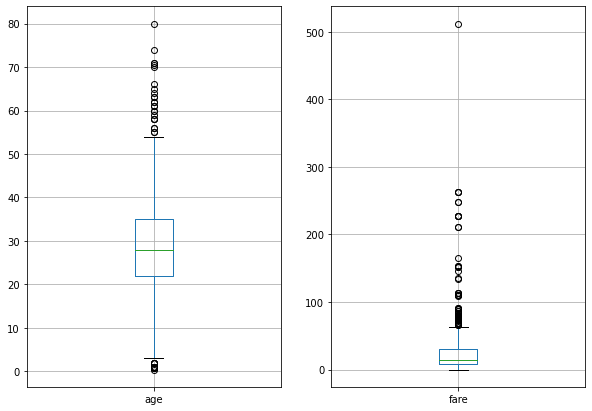

      count       mean        std   min      25%   50%      75%       max
age   498.0  29.351245  13.088108  0.42  22.0000  28.0  35.0000   80.0000
fare  498.0  31.130028  47.162206  0.00   7.8958  13.5  30.3927  512.3292
0    307
1    191
Name: survived, dtype: int64


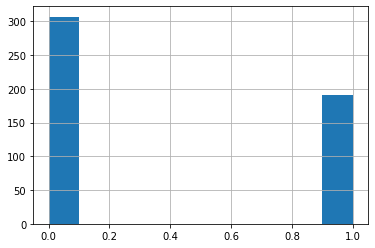

survived             0           1
age  count  307.000000  191.000000
     mean    29.889251   28.486492
     std     12.603394   13.821601
     min      1.000000    0.420000
     25%     23.000000   21.500000
     50%     28.000000   28.000000
     75%     34.750000   35.000000
     max     74.000000   80.000000
fare count  307.000000  191.000000
     mean    22.953323   44.272688
     std     33.881277   60.727051
     min      0.000000    0.000000
     25%      7.854200   11.187500
     50%      9.500000   26.000000
     75%     26.000000   53.100000
     max    263.000000  512.329200
(0, 1)
{'fare': [18893.0, 2.4211056747949507e-11]}

Combination: (0, 1)
Measurement: age
t: 30406.0, p: 0.4835041885397747



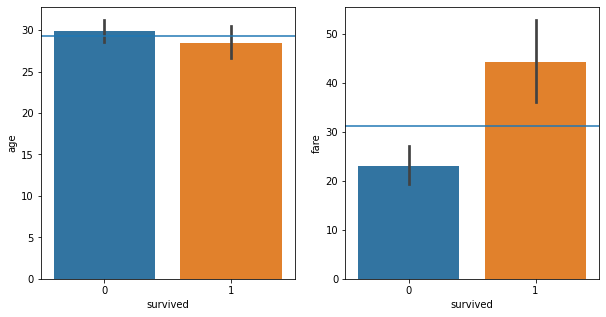

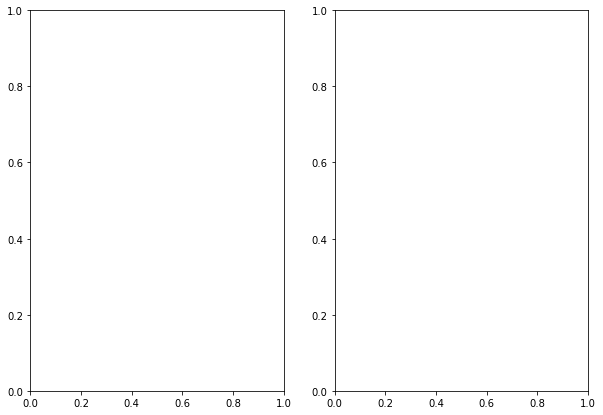

Categories related to survived:
pclass
sibsp
parch
alone
embarked_S
sex_male


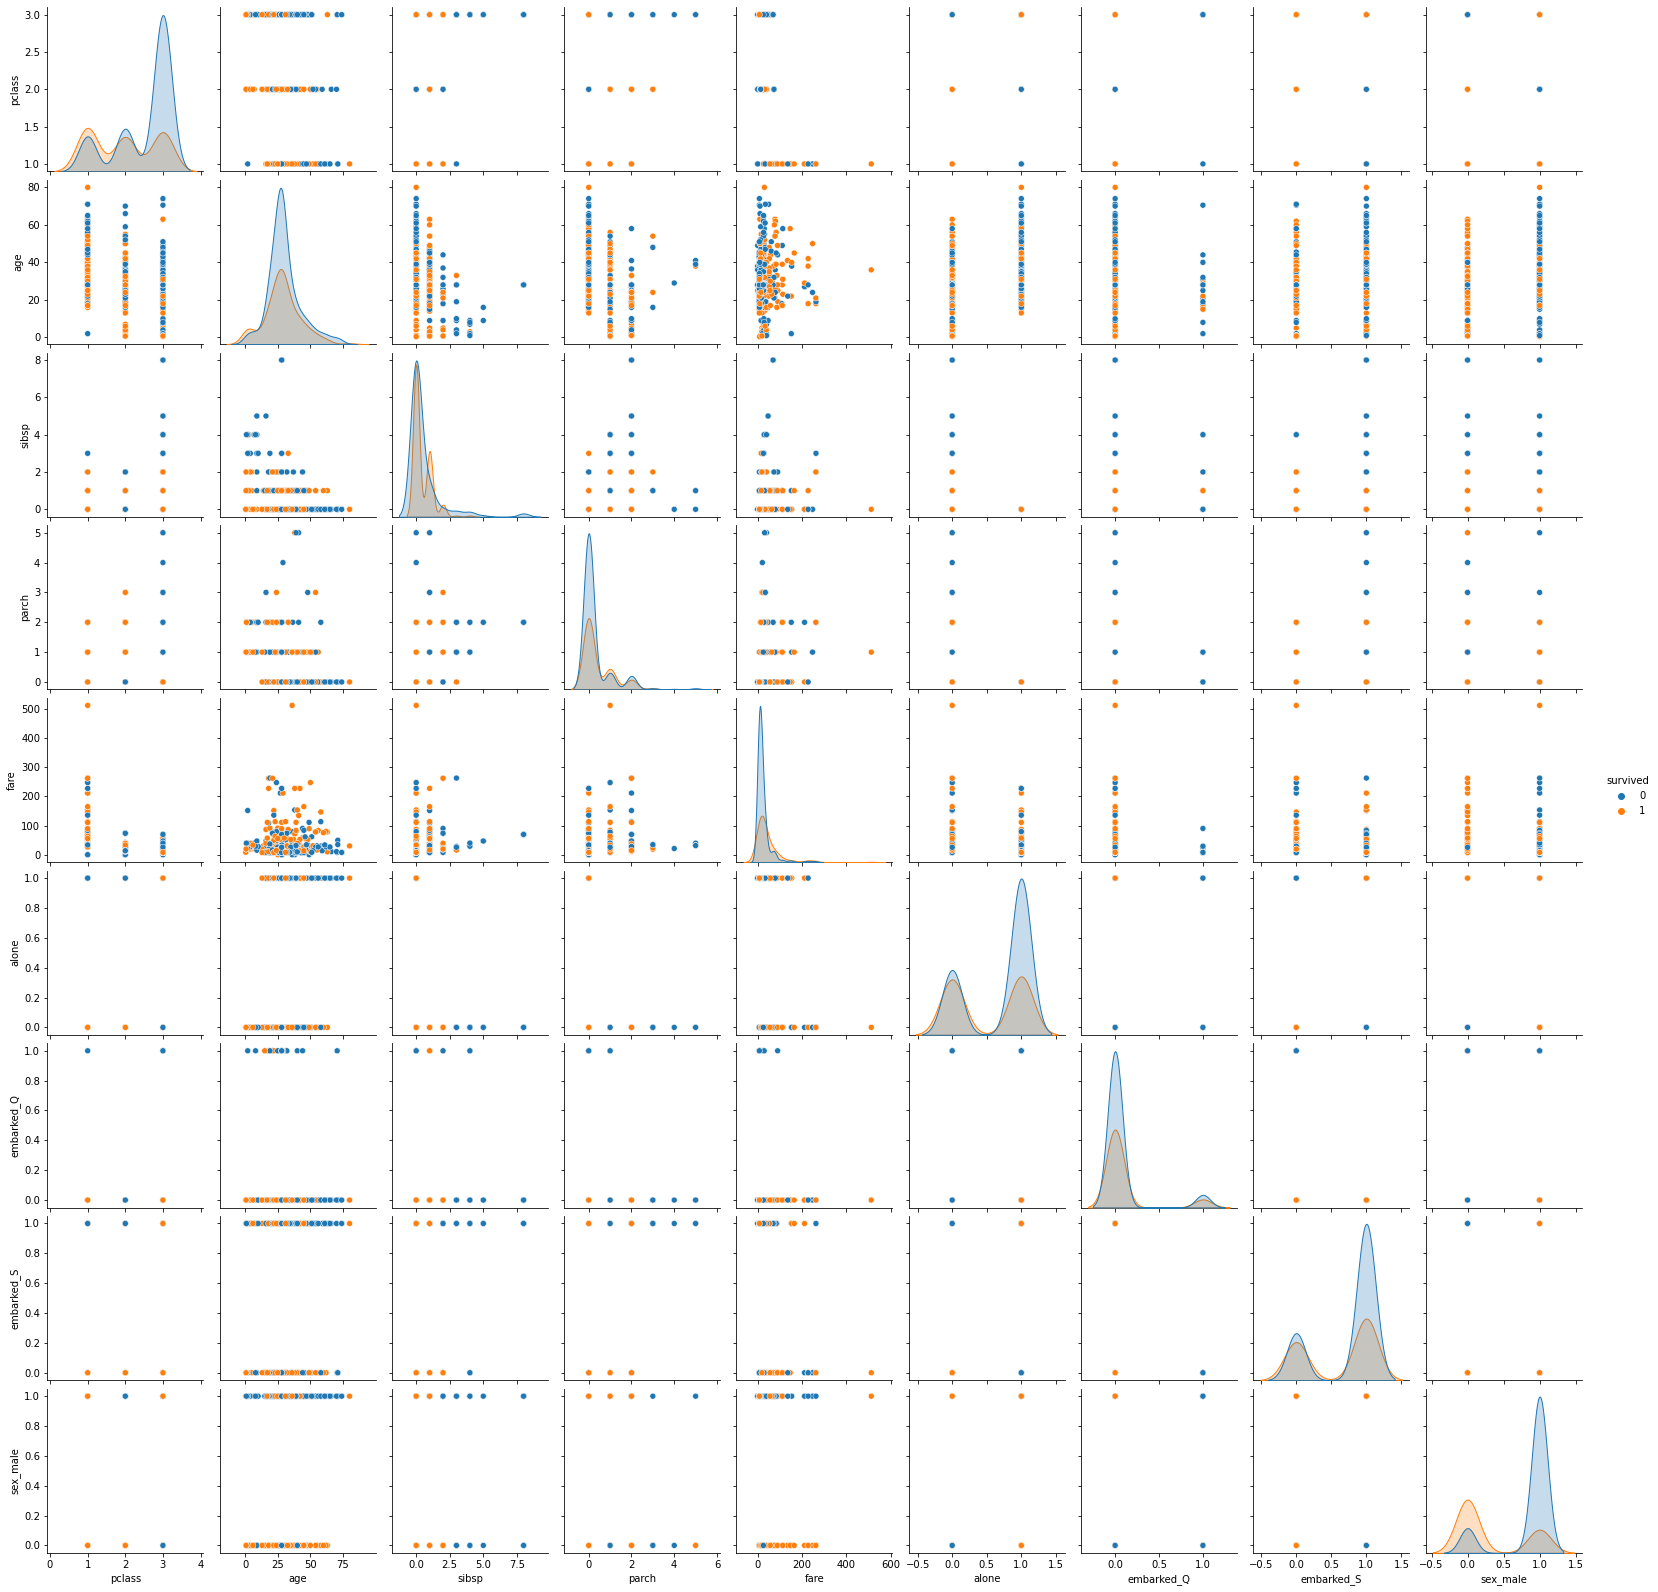

In [16]:
titanic_df, categories, quant_cols = prepare.acquire_prep_titanic()
train, validate, test = split.train_validate_test_split(titanic_df, 'survived')

modeling.impute_value(train, validate, test, col_names=['age'])


train = exploration.overview(train, categories, quant_cols, 'survived')
validate = validate[train.columns]

In [17]:
train

,age,fare,pclass,sibsp,parch,alone,embarked_S,sex_male,survived
583,36.0,40.1250,1,0,0,1,0,1,0
165,9.0,20.5250,3,0,2,0,1,1,1
50,7.0,39.6875,3,4,1,0,1,1,0
259,50.0,26.0000,2,0,1,0,1,0,1
306,28.0,110.8833,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
313,28.0,7.8958,3,0,0,1,1,1,0
636,32.0,7.9250,3,0,0,1,1,1,0
222,51.0,8.0500,3,0,0,1,1,1,0
485,28.0,25.4667,3,3,1,0,1,0,0


In [18]:
validate

,age,fare,pclass,sibsp,parch,alone,embarked_S,sex_male,survived
610,39.0,31.2750,3,1,5,0,1,0,0
424,18.0,20.2125,3,1,1,0,1,1,0
568,28.0,7.2292,3,0,0,1,0,1,0
334,28.0,133.6500,1,1,0,0,1,0,1
101,28.0,7.8958,3,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
176,28.0,25.4667,3,3,1,0,1,1,0
372,19.0,8.0500,3,0,0,1,1,1,0
737,35.0,512.3292,1,0,0,1,0,1,1
862,48.0,25.9292,1,0,0,1,1,0,1


In [21]:
modeling.decision_tree(train, validate, test, 'survived', depth=8, loop=True)

Classification Report for Tree with 1 depth on training set:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498

Classification Report for Tree with 1 depth on validate set:               precision    recall  f1-score   support

           0       0.80      0.83      0.81       132
           1       0.70      0.66      0.68        82

    accuracy                           0.76       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.76      0.76      0.76       214

Classification Report for Tree with 2 depth on training set:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       19